# DSP Practical HW2 

# Name: Kimia Mohsenian

# Student number: 97110671

# Instructor: Dr. Karbasi

In [114]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import sounddevice
from scipy.io import wavfile
import math
from scipy import signal
import sounddevice as sd
import soundfile as sf
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from scipy.signal import lfilter

## Question 1

### Part 1

<ipython-input-115-0f1db93b2e23>:10: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  sound1_fft = scipy.fft(sound1)


34509


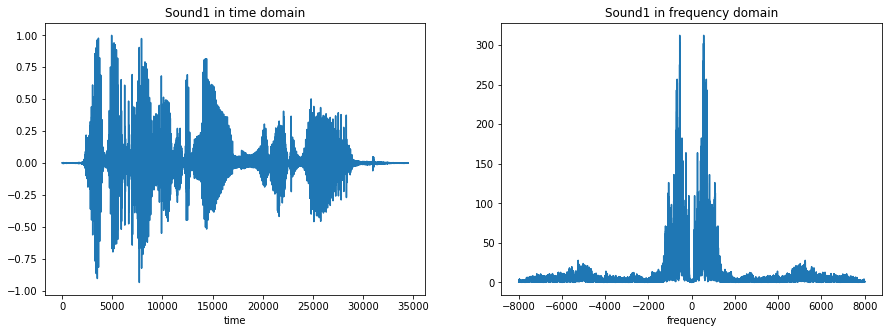

In [115]:
## Part 1

# Opening sound1.mat
sound = scipy.io.loadmat(r'E:\university\Semester 6\DSP\Homework\Practical\HW2\sound1.mat')
sound1 = sound['s']
sound1 = sound1[:,0]
#print(sound)

# frequency domain
sound1_fft = scipy.fft(sound1)
sound1_fft_shift = scipy.fft.fftshift(sound1_fft)
sound1_fft_shift_magnitude = np.abs(sound1_fft_shift)
# mapping the x-axis to frequencies
fs = 16000 #sampling frequency
T = 1/fs
n = len(sound1)
f = np.linspace(-1/(2*T), 1/(2*T), n)
print(len(f))
# Plotting the sound in time and frequency domain
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(sound1)
axs[0].set_title("Sound1 in time domain", color="black")
axs[0].set_xlabel("time", color="black")

axs[1].plot(f, sound1_fft_shift_magnitude)
axs[1].set_title("Sound1 in frequency domain", color="black")
axs[1].set_xlabel("frequency", color="black")

# playing the sound
sounddevice.play(sound1,16000)



### Part 2

Text(0.5, 0, 'time')

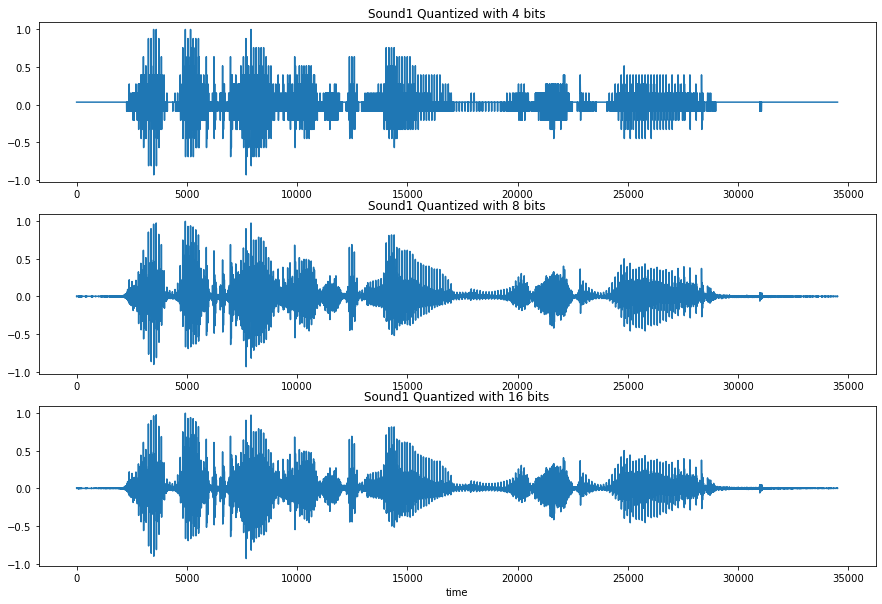

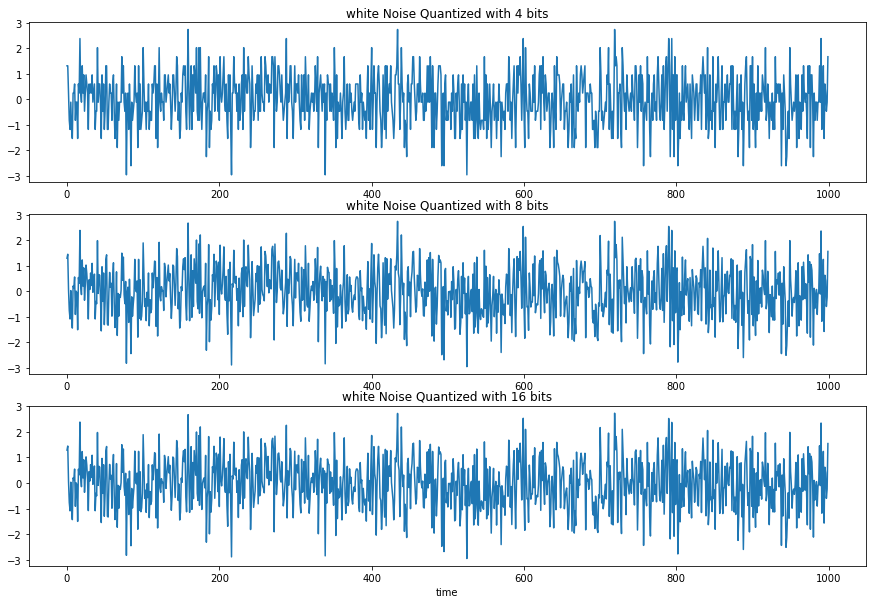

In [116]:
# Generating white guassian noise

# seed random number generator
seed(1)
# create white noise series
white_noise = [gauss(0.0, 1.0) for i in range(1000)]
white_noise = Series(white_noise)
#plt.figure(figsize=(15,5))
#plt.plot(series)
#plt.title("White Guassian Noise")


## Quantization 

######## Quantizing the sound

min_ = min(sound1)
# Adding the least value of the signal to it to make the signal positive
sound1_p = sound1 + np.abs(min_)
# Normalizing to 0-1
max_ = max(sound1_p)
sound1_p = sound1_p/max_

# B = 4 bits
k1 = 2**4   # number of quantization levels
sound1_p_4 = sound1_p*k1
sound1_quantized_4bit = np.round(sound1_p_4)
sound1_quantized_4bit = sound1_quantized_4bit/(max(sound1_quantized_4bit))
sound1_quantized_4bit = sound1_quantized_4bit*max_
sound1_quantized_4bit = sound1_quantized_4bit - np.abs(min_)
err_sound1_4 = sound1_quantized_4bit - sound1

# B = 8 bits
k2 = 2**8   # number of quantization levels
sound1_p_8 = sound1_p*k2
sound1_quantized_8bit = np.round(sound1_p_8)
sound1_quantized_8bit = sound1_quantized_8bit/(max(sound1_quantized_8bit))
sound1_quantized_8bit = sound1_quantized_8bit*max_
sound1_quantized_8bit = sound1_quantized_8bit - np.abs(min_)
err_sound1_8 = sound1_quantized_8bit - sound1

# B = 16 bits
k3 = 2**16   # number of quantization levels
sound1_p_16 = sound1_p*k3
sound1_quantized_16bit = np.round(sound1_p_16)
sound1_quantized_16bit = sound1_quantized_16bit/(max(sound1_quantized_16bit))
sound1_quantized_16bit = sound1_quantized_16bit*max_
sound1_quantized_16bit = sound1_quantized_16bit - np.abs(min_)
err_sound1_16 = sound1_quantized_16bit - sound1

######## Quantizing white noise
min_ = min(white_noise)
# Adding the least value of the signal to it to make the signal positive
white_noise_p = white_noise + np.abs(min_)
# Normalizing to 0-1
max_ = max(white_noise_p)
white_noise_p = white_noise_p/max_

# B = 4 bits
white_noise_p_4 = white_noise_p*k1
white_noise_quantized_p_4bit = np.round(white_noise_p_4)
white_noise_quantized_p_4bit = white_noise_quantized_p_4bit/(max(white_noise_quantized_p_4bit))
white_noise_quantized_p_4bit = white_noise_quantized_p_4bit*max_
white_noise_quantized_p_4bit = white_noise_quantized_p_4bit - np.abs(min_)
err_white_noise_4 = white_noise_quantized_p_4bit - white_noise

# B = 8 bits
white_noise_p_8 = white_noise_p*k2
white_noise_quantized_p_8bit = np.round(white_noise_p_8)
white_noise_quantized_p_8bit = white_noise_quantized_p_8bit/(max(white_noise_quantized_p_8bit))
white_noise_quantized_p_8bit = white_noise_quantized_p_8bit*max_
white_noise_quantized_p_8bit = white_noise_quantized_p_8bit - np.abs(min_)
err_white_noise_8 = white_noise_quantized_p_8bit - white_noise

# B = 16 bits
white_noise_p_16 = white_noise_p*k3
white_noise_quantized_p_16bit = np.round(white_noise_p_16)
white_noise_quantized_p_16bit = white_noise_quantized_p_16bit/(max(white_noise_quantized_p_16bit))
white_noise_quantized_p_16bit = white_noise_quantized_p_16bit*max_
white_noise_quantized_p_16bit = white_noise_quantized_p_16bit - np.abs(min_)
err_white_noise_16 = white_noise_quantized_p_16bit - white_noise

fig, axs = plt.subplots(3,1,figsize=(15,10))
axs[0].plot(sound1_quantized_4bit)
axs[0].set_title("Sound1 Quantized with 4 bits", color="black")

axs[1].plot(sound1_quantized_8bit)
axs[1].set_title("Sound1 Quantized with 8 bits", color="black")

axs[2].plot(sound1_quantized_16bit)
axs[2].set_title("Sound1 Quantized with 16 bits", color="black")
axs[2].set_xlabel("time", color="black")


fig1, axs1 = plt.subplots(3,1,figsize=(15,10))
axs1[0].plot(white_noise_quantized_p_4bit)
axs1[0].set_title("white Noise Quantized with 4 bits", color="black")

axs1[1].plot(white_noise_quantized_p_8bit)
axs1[1].set_title("white Noise Quantized with 8 bits", color="black")

axs1[2].plot(white_noise_quantized_p_16bit)
axs1[2].set_title("white Noise Quantized with 16 bits", color="black")
axs1[2].set_xlabel("time", color="black")



#### a

In [117]:
# mean and variance of error

###  mean
## sound1
mean_err_sound1_4 = np.mean(err_sound1_4)
mean_err_sound1_8 = np.mean(err_sound1_8)
mean_err_sound1_16 = np.mean(err_sound1_16)

print("The mean of the error for sound1 when quantizing with 4 bits is: ",mean_err_sound1_4)
print("The mean of the error for sound1 when quantizing with 8 bits is: ",mean_err_sound1_8)
print("The mean of the error for sound1 when quantizing with 16 bits is: ",mean_err_sound1_16)
print("--------------------------------------------------------------------------------------------------")
## white noise
mean_err_white_noise_4 = np.mean(err_white_noise_4)
mean_err_white_noise_8 = np.mean(err_white_noise_8)
mean_err_white_noise_16 = np.mean(err_white_noise_16)

print("The mean of the error for white noise when quantizing with 4 bits is: ",mean_err_white_noise_4)
print("The mean of the error for white_noise when quantizing with 8 bits is: ",mean_err_white_noise_8)
print("The mean of the error for white_noise when quantizing with 16 bits is: ",mean_err_white_noise_16)
print("--------------------------------------------------------------------------------------------------")
# variance

var_err_sound1_4 = np.var(err_sound1_4)
var_err_sound1_8 = np.var(err_sound1_8)
var_err_sound1_16 = np.var(err_sound1_16)

print("The variance of the error for sound1 when quantizing with 4 bits is: ",var_err_sound1_4)
print("The variance of the error for sound1 when quantizing with 8 bits is: ",var_err_sound1_8)
print("The variance of the error for sound1 when quantizing with 16 bits is: ",var_err_sound1_16)
print("--------------------------------------------------------------------------------------------------")
## white noise
var_err_white_noise_4 = np.var(err_white_noise_4)
var_err_white_noise_8 = np.var(err_white_noise_8)
var_err_white_noise_16 = np.var(err_white_noise_16)

print("The variance of the error for white noise when quantizing with 4 bits is: ",var_err_white_noise_4)
print("The variance of the error for white_noise when quantizing with 8 bits is: ",var_err_white_noise_8)
print("The variance of the error for white_noise when quantizing with 16 bits is: ",var_err_white_noise_16)
print("--------------------------------------------------------------------------------------------------")


The mean of the error for sound1 when quantizing with 4 bits is:  0.010812697160369106
The mean of the error for sound1 when quantizing with 8 bits is:  0.0001815169650689389
The mean of the error for sound1 when quantizing with 16 bits is:  3.70128325164061e-07
--------------------------------------------------------------------------------------------------
The mean of the error for white noise when quantizing with 4 bits is:  0.0020364251905502064
The mean of the error for white_noise when quantizing with 8 bits is:  0.0003446907871992052
The mean of the error for white_noise when quantizing with 16 bits is:  3.616220434697495e-07
--------------------------------------------------------------------------------------------------
The variance of the error for sound1 when quantizing with 4 bits is:  0.0011269435180511036
The variance of the error for sound1 when quantizing with 8 bits is:  4.969924765581401e-06
The variance of the error for sound1 when quantizing with 16 bits is:  7.17

#### b

Text(0.5, 1.0, 'Histogram of white noise quantized with 16 bits')

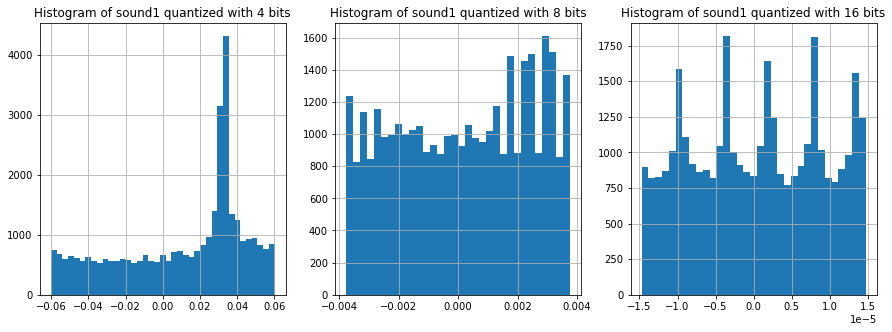

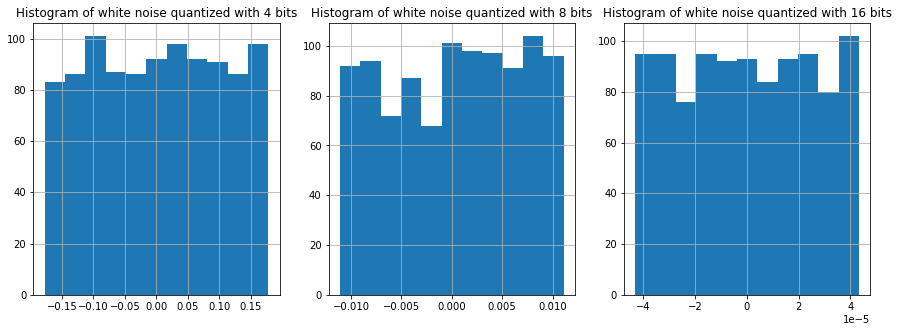

In [118]:
#### Histogram
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].hist(err_sound1_4,bins='auto')
axs[0].set_title("Histogram of sound1 quantized with 4 bits")
axs[1].hist(err_sound1_8,bins='auto')
axs[1].set_title("Histogram of sound1 quantized with 8 bits")
axs[2].hist(err_sound1_16,bins='auto')
axs[2].set_title("Histogram of sound1 quantized with 16 bits")

fig1, axs1 = plt.subplots(1,3,figsize=(15,5))
axs1[0].grid()
axs1[1].grid()
axs1[2].grid()
axs1[0].hist(err_white_noise_4,bins='auto')
axs1[0].set_title("Histogram of white noise quantized with 4 bits")
axs1[1].hist(err_white_noise_8,bins='auto')
axs1[1].set_title("Histogram of white noise quantized with 8 bits")
axs1[2].hist(err_white_noise_16,bins='auto')
axs1[2].set_title("Histogram of white noise quantized with 16 bits")


#### c

Text(0.5, 1.0, 'Power Spectral Density of white noise quantized with 16 bits')

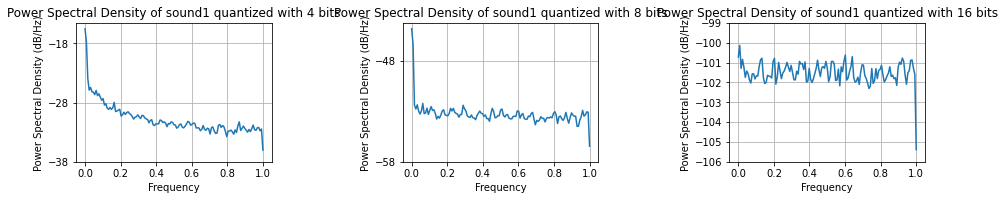

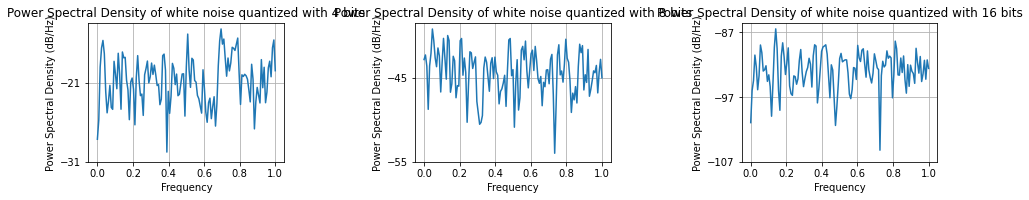

In [119]:
# Power Spectral Density

fig, axs = plt.subplots(1,3,figsize=(15,5))
fig.tight_layout(pad=10.0)

axs[0].psd(err_sound1_4)
axs[0].set_title("Power Spectral Density of sound1 quantized with 4 bits")
axs[1].psd(err_sound1_8)
axs[1].set_title("Power Spectral Density of sound1 quantized with 8 bits")
axs[2].psd(err_sound1_16)
axs[2].set_title("Power Spectral Density of sound1 quantized with 16 bits")


fig, axs = plt.subplots(1,3,figsize=(15,5))
fig.tight_layout(pad=10.0)

axs[0].psd(err_white_noise_4)
axs[0].set_title("Power Spectral Density of white noise quantized with 4 bits")
axs[1].psd(err_white_noise_8)
axs[1].set_title("Power Spectral Density of white noise quantized with 8 bits")
axs[2].psd(err_white_noise_16)
axs[2].set_title("Power Spectral Density of white noise quantized with 16 bits")

#### d

Text(0.5, 1.0, 'Autocorrelation of sound1 quantized with 16 bits')

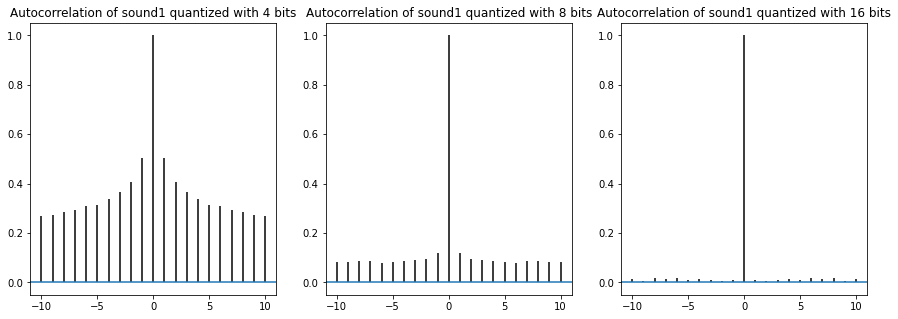

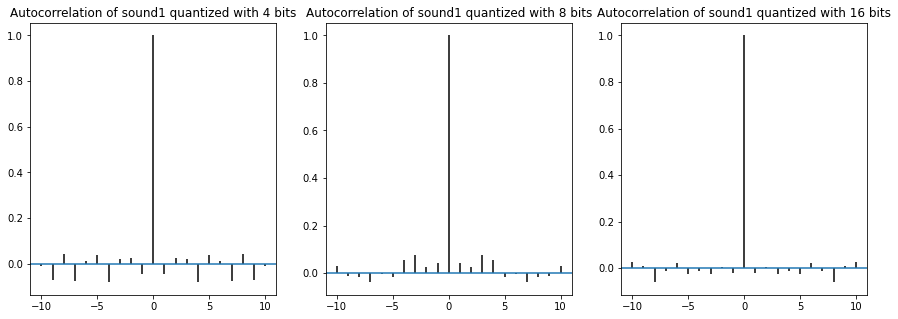

In [120]:
## Autocorrelation

fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].acorr(err_sound1_4)
axs[0].set_title("Autocorrelation of sound1 quantized with 4 bits")
axs[1].acorr(err_sound1_8)
axs[1].set_title("Autocorrelation of sound1 quantized with 8 bits")
axs[2].acorr(err_sound1_16)
axs[2].set_title("Autocorrelation of sound1 quantized with 16 bits")


fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].acorr(err_white_noise_4)
axs[0].set_title("Autocorrelation of sound1 quantized with 4 bits")
axs[1].acorr(err_white_noise_8)
axs[1].set_title("Autocorrelation of sound1 quantized with 8 bits")
axs[2].acorr(err_white_noise_16)
axs[2].set_title("Autocorrelation of sound1 quantized with 16 bits")


#### e

Text(0.5, 1.0, 'Cross-correlation when quantized with 16 bits')

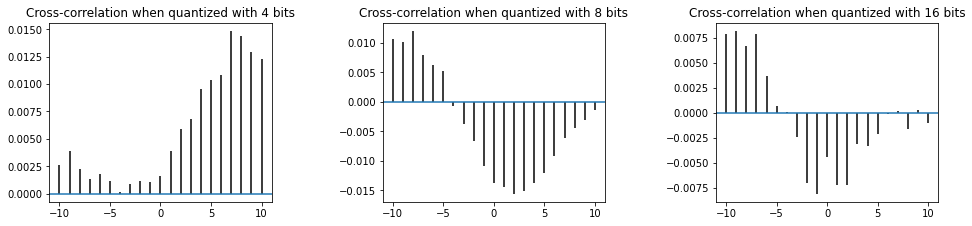

In [121]:
# cross-correlation
fig, axs = plt.subplots(1,3,figsize=(15,5))
fig.tight_layout(pad=8.0)

axs[0].xcorr(err_sound1_4, sound1)
axs[0].set_title("Cross-correlation when quantized with 4 bits")
axs[1].xcorr(err_sound1_8, sound1)
axs[1].set_title("Cross-correlation when quantized with 8 bits")
axs[2].xcorr(err_sound1_16, sound1)
axs[2].set_title("Cross-correlation when quantized with 16 bits")


### Part 3

<ipython-input-122-d6d77a6e3a65>:9: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  sound1_quantized_4bit_fft = scipy.fft(sound1_quantized_4bit)


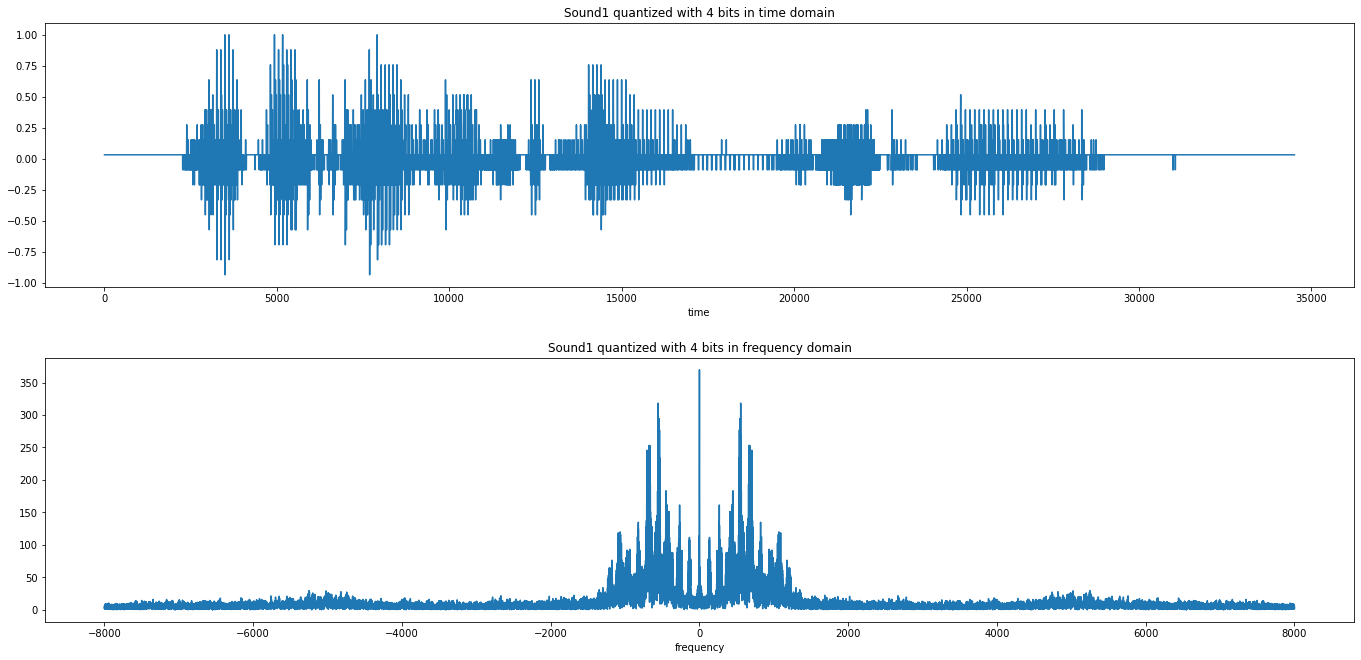

In [122]:
# Time domain
fig, axs = plt.subplots(2,1,figsize=(20,10))
fig.tight_layout(pad=5.0)
axs[0].plot(sound1_quantized_4bit)
axs[0].set_title("Sound1 quantized with 4 bits in time domain")
axs[0].set_xlabel("time", color="black")

# Frequency domain
sound1_quantized_4bit_fft = scipy.fft(sound1_quantized_4bit)
sound1_quantized_4bit_fft = scipy.fft.fftshift(sound1_quantized_4bit_fft)
# mapping the x axis to frequency domain
fs = 16000 #sampling frequency
T = 1/fs
n = len(sound1_quantized_4bit)
f = f = np.linspace(-1/(2*T), 1/(2*T), n)

axs[1].plot(f, np.abs(sound1_quantized_4bit_fft))
axs[1].set_title("Sound1 quantized with 4 bits in frequency domain")
axs[1].set_xlabel("frequency", color="black")

# Playing the voice
sounddevice.play(sound1_quantized_4bit,16000)


### Part 4

<ipython-input-123-6c02515047f0>:9: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  filterd_fft = scipy.fft(filtered)
D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


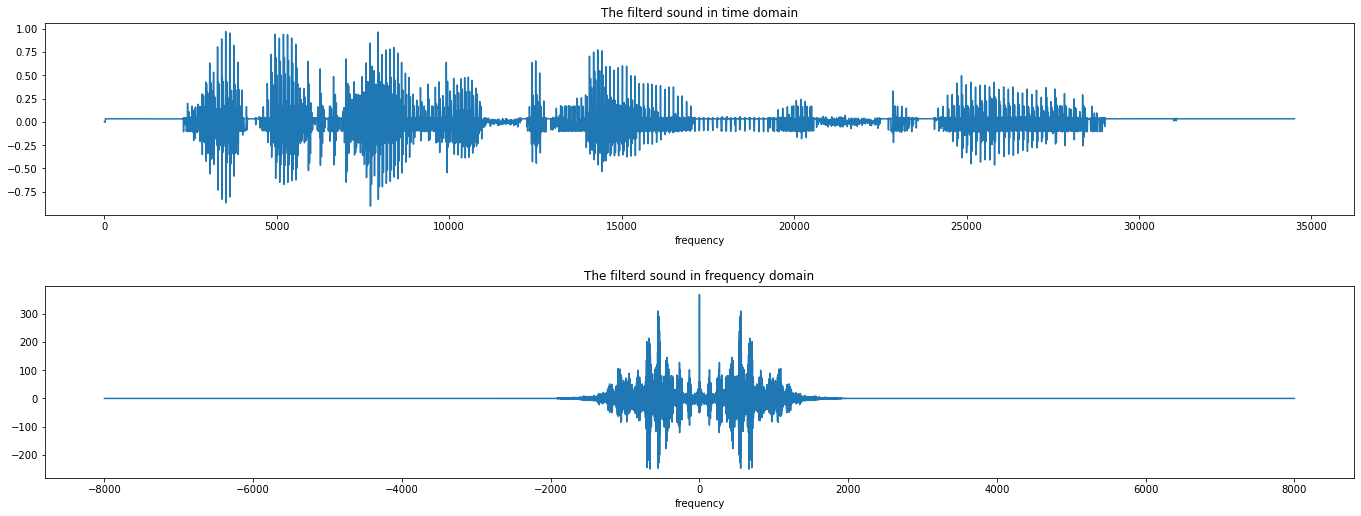

In [123]:
# generating the lowpass filter, note: the output of the firwin is the coefficients of the z-transform of the filter
numtaps = 50
cutoff = 1500
a = scipy.signal.firwin(numtaps, cutoff, pass_zero=True, fs=16000)


# applying the filter to the sound
filtered = lfilter(a,1,sound1_quantized_4bit)
filterd_fft = scipy.fft(filtered)
filterd_fft_shift = scipy.fft.fftshift(filterd_fft)

fig, axs = plt.subplots(2,1,figsize=(20,8))
fig.tight_layout(pad=5.0)
axs[0].plot(filtered)
axs[0].set_title("The filterd sound in time domain")
axs[0].set_xlabel("frequency", color="black")

axs[1].plot(f, filterd_fft_shift)
axs[1].set_title("The filterd sound in frequency domain")
axs[1].set_xlabel("frequency", color="black")

sounddevice.play(filtered,16000)




### Part 5

<ipython-input-124-9a28e72f9b90>:31: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  output_fft = scipy.fft(output)
D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


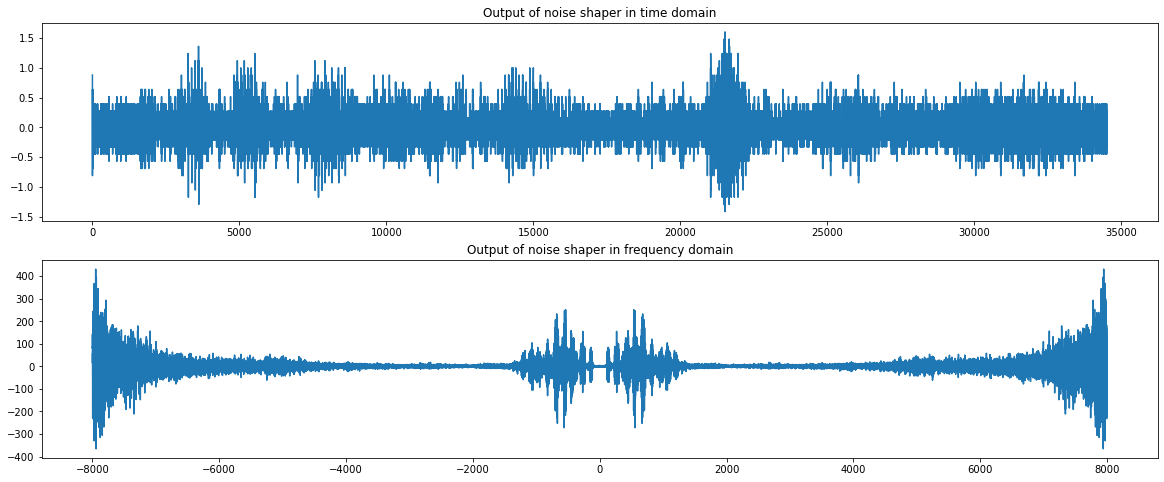

In [124]:
def noise_shaper(x):
    N = len(x)
    y = np.zeros(N)
    x1 = np.zeros(N)
    y1 = np.zeros(N)
    r = 0
    
    max_ = np.max(x)
    min_ = np.abs(np.min(x))

    for i in range(N-1):
        if i==0:
            new_r = x[i]
        else:
            new_r = x[i] - y[i-1] + r
        r = new_r

        #print(x1[i])
        r_q = (r + min_)/max_
        r_q = int (np.round(r_q * (2**4)))/(2**4)
        r_q = (r_q)*(max_ + min_) - min_
        y[i] = r_q
        
    return y


output = noise_shaper(sound1)

# frequency domain

output_fft = scipy.fft(output)
output_fft_shift = scipy.fft.fftshift(output_fft)

fs = 16000 #sampling frequency
T = 1/fs
n = len(output_fft)
f = np.linspace(-1/(2*T), 1/(2*T), n)


fig, axs = plt.subplots(2,1,figsize=(20,8)) 
axs[0].plot(output)
axs[0].set_title("Output of noise shaper in time domain")

axs[1].plot(f, output_fft_shift)
axs[1].set_title("Output of noise shaper in frequency domain")

sounddevice.play(output,16000)
        

## Question 2

### Part 1

(534715,)


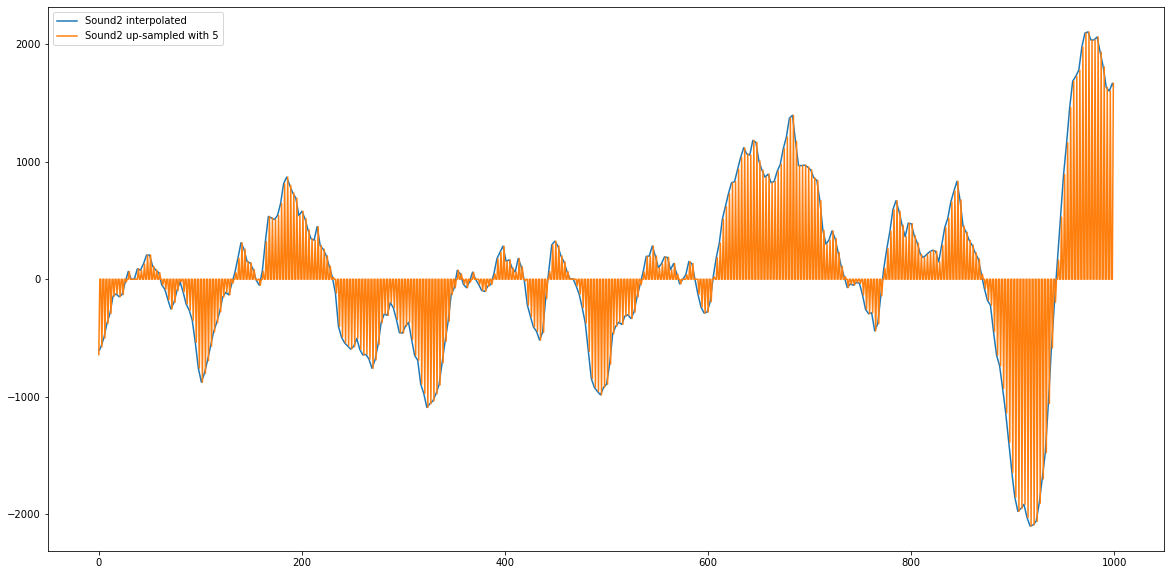

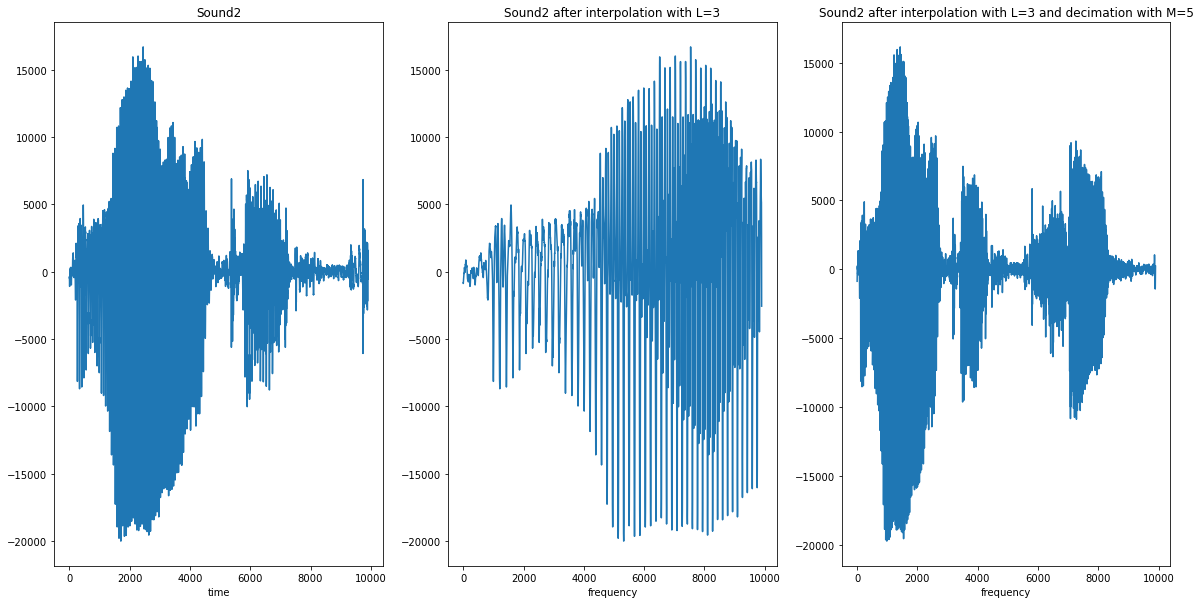

<Figure size 1440x720 with 0 Axes>

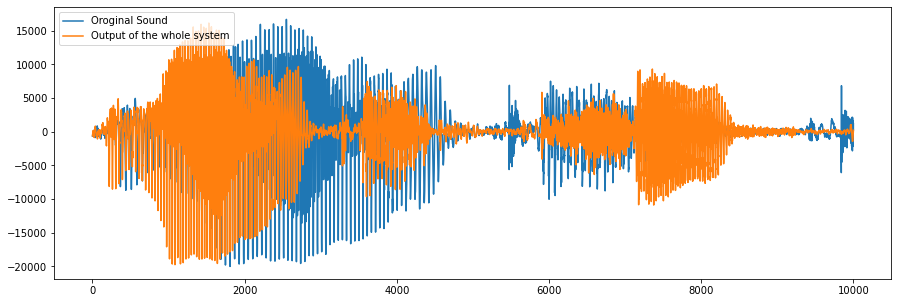

In [125]:
# loading the sound


samplerate, sound2 = wavfile.read(r'E:\university\Semester 6\DSP\Homework\Practical\HW2\sound2.wav')
#plt.plot(sound2)



def linear_interpolation(data, L):
    xlin = []
    N = len(data)
    N_interpolated = (N-1)*L+1
    sum_ = 0
    
    xe = []
    
    # up-sampling with L
    for n in range(N_interpolated):
        if (n%L) == 0:
            xe.append(data[int(n/L)])
        else:
            a = 0
            xe.append(a)

    # interpolation
    for n in (np.arange(L-2,N_interpolated-L+1,1)):
        for k in (np.arange(n-L+1,n+L)):
            if (abs(n-k)<=L):
                h_lin = 1-(abs(n-k))/L
            else:
                h_lin = 0
            sum_ = sum_ + xe[k]*h_lin
        xlin.append(sum_)
        sum_ = 0 
    
    return xlin, xe


sound2_lin,xe = linear_interpolation(sound2, 3)


fig, axs = plt.subplots(1,figsize=(20,10))
plt.plot(sound2_lin[0:1000],label="Sound2 interpolated")
plt.plot(xe[0:1000],label="Sound2 up-sampled with 5")
plt.legend(loc="upper left")

print(np.shape(sound2_lin))

fig, axs = plt.subplots(1,3,figsize=(20,10))
axs[0].plot(sound2[100:10000])
axs[0].set_title("Sound2", color="black")
axs[0].set_xlabel("time", color="black")

axs[1].plot(sound2_lin[100:10000])
axs[1].set_title("Sound2 after interpolation with L=3", color="black")
axs[1].set_xlabel("frequency", color="black")
    
#sounddevice.play(sound2_lin, 3200)

# decimation with M=5
y = scipy.signal.decimate(sound2_lin, 5, n=None, ftype='iir', axis=-1, zero_phase=True)
sounddevice.play(y, 9600)   

axs[2].plot(y[100:10000])
axs[2].set_title("Sound2 after interpolation with L=3 and decimation with M=5", color="black")
axs[2].set_xlabel("frequency", color="black")


plt.figure(figsize=(20,10))

# plotting signals on a same graph
fig, axs = plt.subplots(1,figsize=(15,5))
axs.plot(sound2[0:10000], label="Oroginal Sound")
axs.plot(y[0:10000], label="Output of the whole system")
plt.legend(loc="upper left")

### Part 2

Text(0.5, 1.0, 'Output of noise shaper in frequency domain')

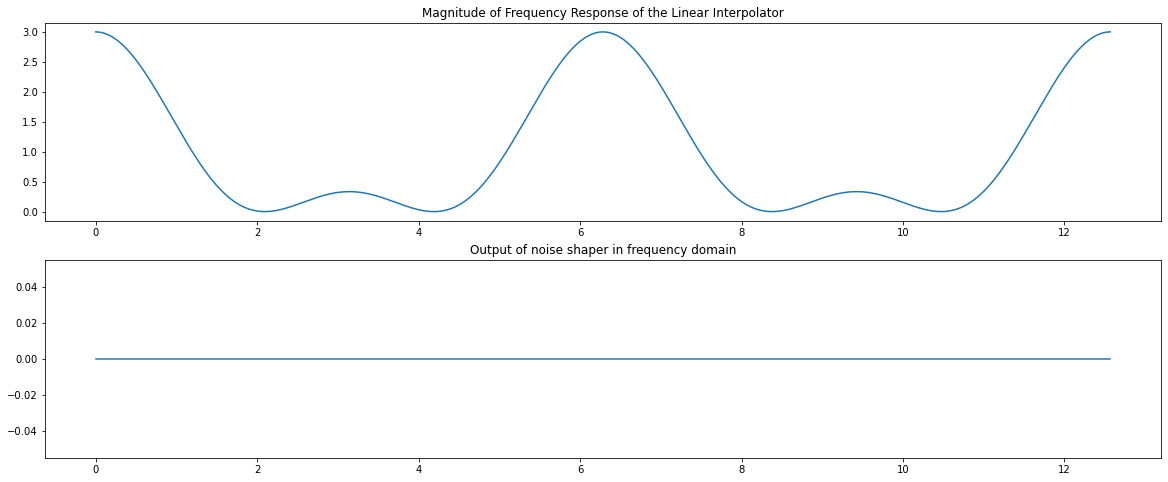

In [138]:

def H_z(z):
    H_z = 1 + (2/3)*(z**(-1) + z**1) + (1/3)*(z**(-2) + z**2)
    return H_z

w = np.linspace(0, 4*np.pi, 1000)

fig, axs = plt.subplots(2,1,figsize=(20,8)) 
axs[0].plot(w, np.abs(H_z(np.exp(1j*w))))
axs[0].set_title("Magnitude of Frequency Response of the Linear Interpolator")

axs[1].plot(w, (H_z(np.exp(1j*w))).imag>1)
axs[1].set_title("Output of noise shaper in frequency domain")

### Part 3

In [139]:
# consodering L to be 3
def polyphase(x):
    n = len(x)
    x1 = x
    x2 = []
    x3 = []
    for i in range(n-1):
        f = (2/3)*x[i] + (1/3)*x[i+1]
        x2.append(f)
        
    for i in range(n-1):
        f = (1/3)*x[i] + (2/3)*x[i+1]
        x3.append(f)
     
    n1 = (len(x1)-1)*3+1
    n2 = (len(x2)-1)*3+1
    n3 = (len(x3)-1)*3+1
    
    #print(n2)
    
    xe1 = []
    xe2 = []
    xe3 = []
    
     # up-sampling with L
    for n in range(n1):
        if (n%3) == 0:
            xe1.append(x1[int(n/3)])
        else:
            xe1.append(0)
      
    for n in range(n2):
        if (n%3) == 0:
            xe2.append(x2[int(n/3)])
        else:
            xe2.append(0)
    
    for n in range(n3):
        if (n%3) == 0:
            xe3.append(x3[int(n/3)])
        else:
            xe3.append(0)
    
    xe1_p = xe1
    xe2_p = []
    xe3_p = []
    x_final = []
    
    # delay xe2 by one sample and xe3 by two samples
    for i in range(n2-1):
        xe2_p.append(xe2[i+1])
    
    for i in range(n3-2):
        xe3_p.append(xe3[i+2])
    
    #print(len(xe1_p))
    #print(len(xe2_p))
    #print(len(xe3_p))
    
    N = min(len(xe1_p),len(xe2_p),len(xe3_p))
    
    for i in range(N):
        x_final.append(xe1_p[i] + xe2_p[i] + xe3_p[i])
    
    #print(len(x_final))
    
    return x_final


### Part 5

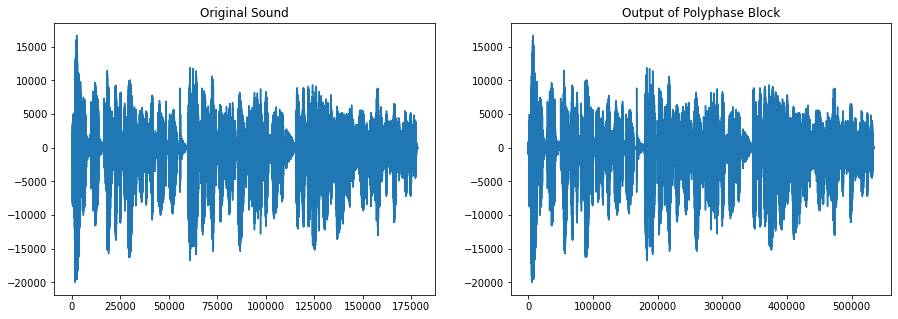

In [140]:
# output of the polyphase function
output_sound = polyphase(sound2)

# plotting
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(sound2)
axs[1].plot(output_sound)
axs[0].set_title("Original Sound")
axs[1].set_title("Output of Polyphase Block")

# playing the voice
#sounddevice.play(output_sound, 48000) 

# saving the output audio
sf.write("Output_of_Polyphase_function.wav", output_sound, 48000)

### Part 6

<ipython-input-141-bdf5c5770437>:10: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  sound2_fft = scipy.fft(sound2)
<ipython-input-141-bdf5c5770437>:14: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  output_sound_fft = scipy.fft(output_sound)
D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'DTFT of Output of Polyphase Block')

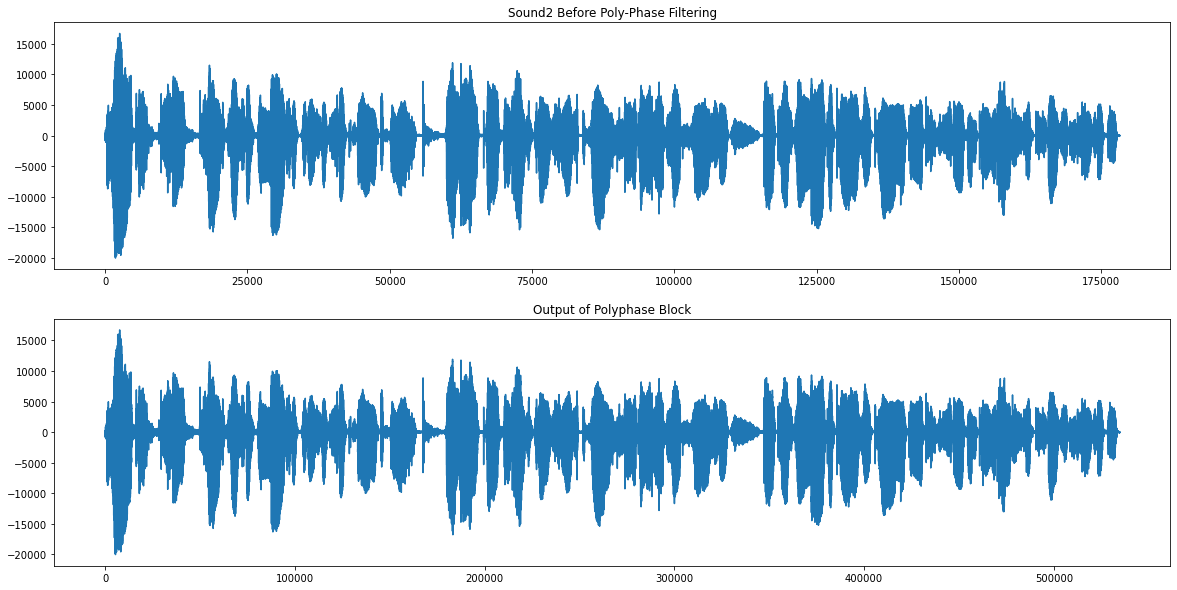

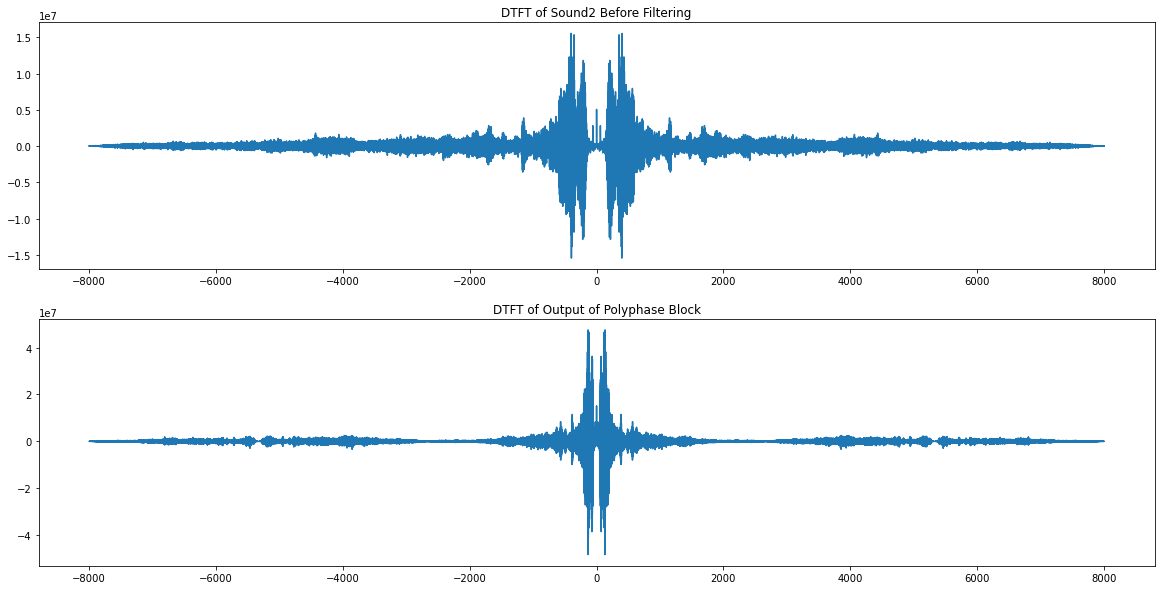

In [141]:
## Time domain

fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].plot(sound2,label="Sound2 Before Filtering")
axs[0].set_title("Sound2 Before Poly-Phase Filtering")
axs[1].plot(output_sound)
axs[1].set_title("Output of Polyphase Block")

# Frequency domain
sound2_fft = scipy.fft(sound2)
sound2_fft_shift = scipy.fft.fftshift(sound2_fft)


output_sound_fft = scipy.fft(output_sound)
output_sound_fft_shift = scipy.fft.fftshift(output_sound_fft)

fs = 16000 #sampling frequency
T = 1/fs
n1 = len(output_sound)
n2 = len(sound2)
f1 = np.linspace(-1/(2*T), 1/(2*T), n1)
f2 = np.linspace(-1/(2*T), 1/(2*T), n2)

fig1, axs1 = plt.subplots(2,1,figsize=(20,10))
axs1[0].plot(f2, sound2_fft_shift)
axs1[0].set_title("DTFT of Sound2 Before Filtering")
axs1[1].plot(f1, output_sound_fft_shift)
axs1[1].set_title("DTFT of Output of Polyphase Block")
